In [ ]:
import numpy as np
from datetime import datetime
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from datetime import datetime
plt.rcParams['figure.figsize'] = [15, 7.5]
plt.rcParams.update({'font.size': 16,'legend.fontsize':16})
import seaborn as sns
import sys
import os
from config import config
import fur.path_assistant as path_assistant
from fur.waveform_reader import read_waveform
from fur.finding_period import get_period
from fur.fluctuations import get_fluctiation_and_noise_var
shift_03_09_2020 = path_assistant.PathAssistant('shift_03_09_2020',      
    ignore_files=["RefCurve_2020-03-10_0_111937_test.Wfm.bin"])
waveforms_dir = shift_03_09_2020.get_waveforms_dir()
results_dir = shift_03_09_2020.get_results_dir()
bpm_files_df = shift_03_09_2020.get_bpm_files_df()
acnet_data_df = shift_03_09_2020.get_acnet_data_df("all_acnet_data_for_directly_connected_case_03_09_2020.csv")
t1 = datetime(2020, 3, 9, 19, 8, 0)
t2 = datetime(2020, 3, 9, 19, 42, 0)

In [ ]:
fluctuation_waveforms_df = shift_03_09_2020.get_fluctuation_waveforms_df()
bpm_files_df = shift_03_09_2020.get_bpm_files_df()

These are bpm waveforms from the "directly connected" data set:

In [ ]:
bpm_files_df = bpm_files_df[(bpm_files_df["file_datetime"] > t1) \
& (bpm_files_df["file_datetime"]<t2)].reset_index()

Veify that the charge in other buckets is negligible:

In [ ]:
for f in bpm_files_df["file_path"]:
    bpm_wf = pd.read_csv(f, index_col=0)
    plt.plot(bpm_wf["reconstructed_signal"])
    plt.show()

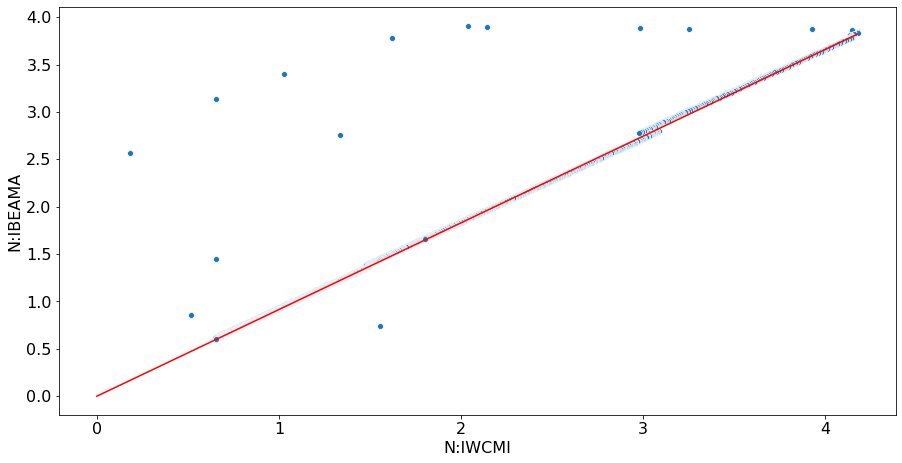

In [17]:
iwcmi_to_ibeam = 0.915
ax = sns.scatterplot(x=-acnet_data_df["N:IWCMI"], y=-acnet_data_df["N:IBEAMA"])
x = np.linspace(0,max(-acnet_data_df["N:IWCMI"]))
ax1 = plt.plot(x, iwcmi_to_ibeam*x, color="red")
plt.show()